<a href="https://colab.research.google.com/github/anithathavamani/anitha/blob/main/Logistic_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

We will use Logistic Regression to model the "Pima Indians Diabetes" data set. This model will predict which people are likely to develop diabetes.


This dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases. The objective of the dataset is to diagnostically predict whether or not a patient has diabetes, based on certain diagnostic measurements included in the dataset. Several constraints were placed on the selection of these instances from a larger database. In particular, all patients here are females at least 21 years old of Pima Indian heritage.

## Import Libraries

In [12]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt       # matplotlib.pyplot plots data
%matplotlib inline
import seaborn as sns

## Load and review data

In [13]:
pdata = pd.read_csv("/content/archive (3).zip")

In [14]:
pdata.shape # Check number of columns and rows in data frame

(100, 4)

In [15]:
pdata.head() # To check first 5 rows of data set

,Unnamed: 0,cgpa,iq,placement
0,0,6.8,123.0,1
1,1,5.9,106.0,0
2,2,5.3,121.0,0
3,3,7.4,132.0,1
4,4,5.8,142.0,0


In [16]:
pdata.isnull().values.any() # If there are any null values in data set

False

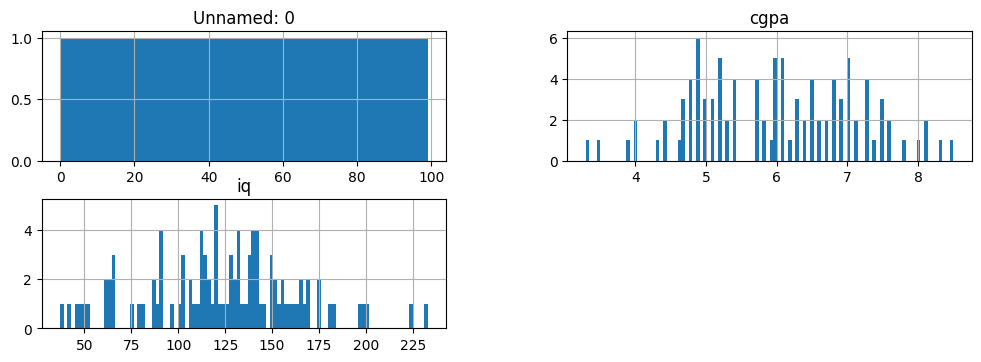

In [17]:
columns = list(pdata)[0:-1] # Excluding Outcome column which has only
pdata[columns].hist(stacked=False, bins=100, figsize=(12,30), layout=(14,2));
# Histogram of first 8 columns

## Identify Correlation in data

In [18]:
pdata.corr() # It will show correlation matrix

,Unnamed: 0,cgpa,iq,placement
Unnamed: 0,1.000000,0.047478,-0.019080,0.144807
cgpa,0.047478,1.000000,-0.098791,0.821688
iq,-0.019080,-0.098791,1.000000,-0.083031
placement,0.144807,0.821688,-0.083031,1.000000


In [19]:
# However we want to see correlation in graphical representation so below is function for that
def plot_corr(df, size=14):
    corr = df.corr()
    fig, ax = plt.subplots(figsize=(size, size))
    ax.matshow(corr)
    plt.xticks(range(len(corr.columns)), corr.columns)
    plt.yticks(range(len(corr.columns)), corr.columns)

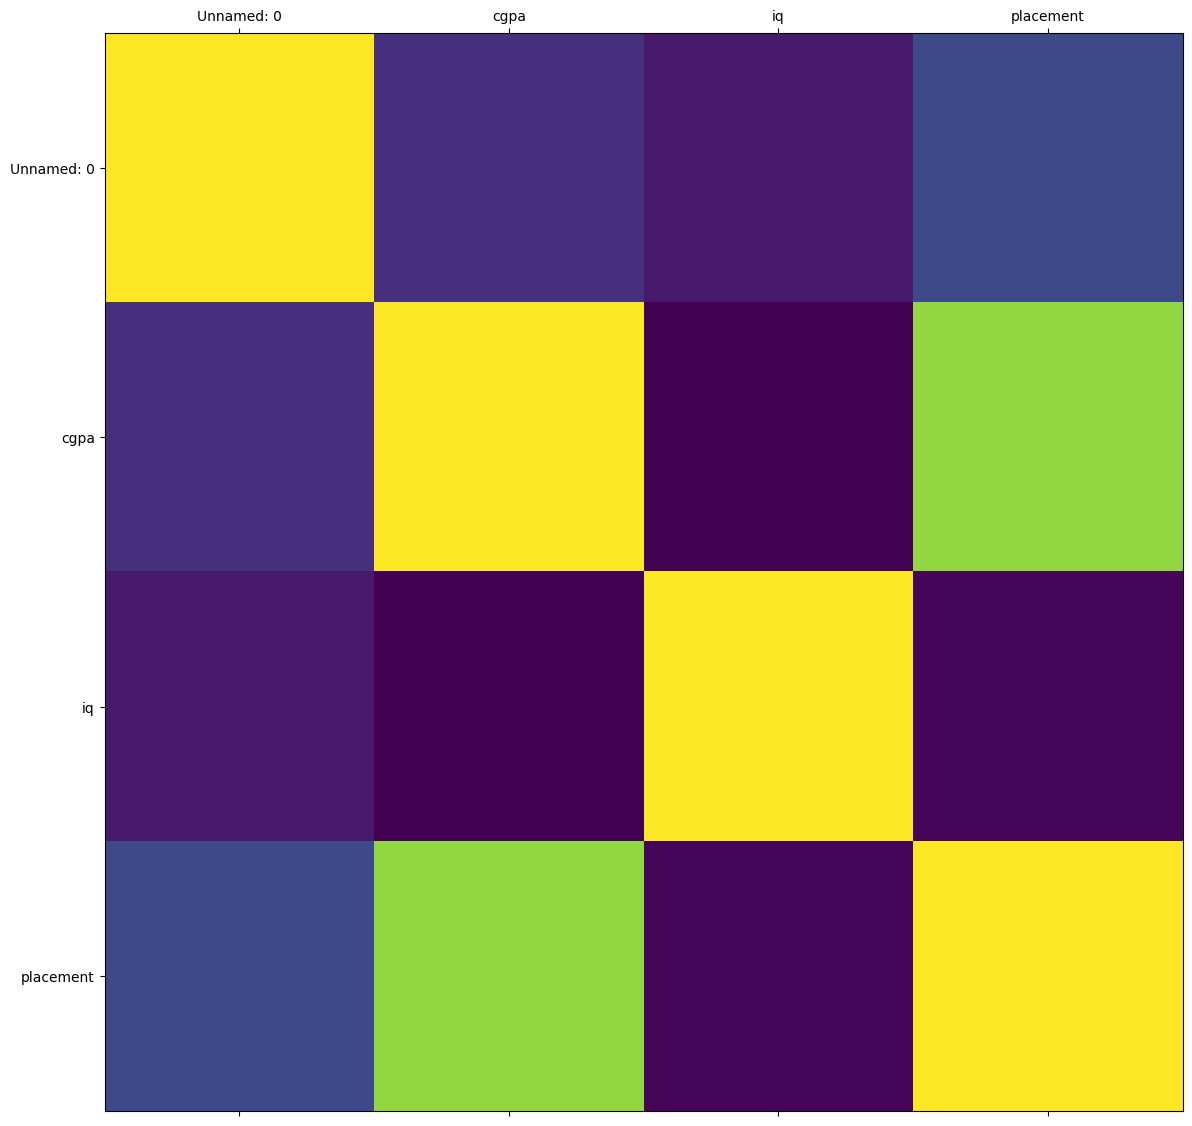

In [20]:
plot_corr(pdata)

In above plot yellow colour represents maximum correlation and blue colour represents minimum correlation.
We can see none of variable have correlation with any other variables.

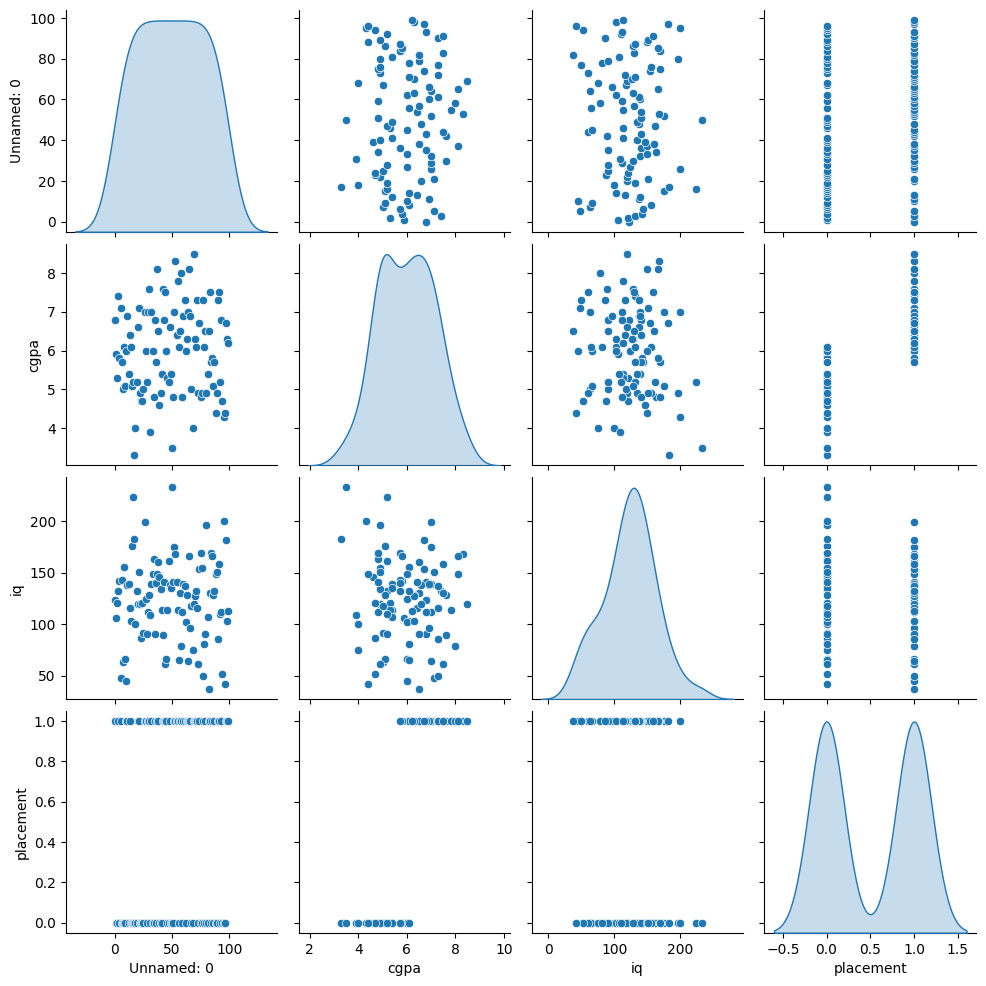

In [21]:
sns.pairplot(pdata,diag_kind='kde')


## Calculate diabetes ratio of True/False from outcome variable

In [23]:
n_true = len(pdata.loc[pdata['placement'] == True])
n_false = len(pdata.loc[pdata['placement'] == False])
print("Number of true cases: {0} ({1:2.2f}%)".format(n_true, (n_true / (n_true + n_false)) * 100 ))
print("Number of false cases: {0} ({1:2.2f}%)".format(n_false, (n_false / (n_true + n_false)) * 100))

Number of true cases: 50 (50.00%)
Number of false cases: 50 (50.00%)


So we have 34.90% people in current data set who have diabetes and rest of 65.10% doesn't have diabetes.

Its a good distribution True/False cases of diabetes in data.

## Spliting the data
We will use 70% of data for training and 30% for testing.

In [24]:
from sklearn.model_selection import train_test_split

X = pdata.drop('placement',axis=1)     # Predictor feature columns (8 X m)
Y = pdata['placement']   # Predicted class (1=True, 0=False) (1 X m)

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=1)
# 1 is just any random seed number

x_train.head()

,Unnamed: 0,cgpa,iq
2,2,5.3,121.0
73,73,4.9,61.0
97,97,6.7,182.0
62,62,6.0,102.0
19,19,5.2,132.0


Lets check split of data

In [25]:
print("{0:0.2f}% data is in training set".format((len(x_train)/len(pdata.index)) * 100))
print("{0:0.2f}% data is in test set".format((len(x_test)/len(pdata.index)) * 100))

80.00% data is in training set
20.00% data is in test set


# Data Preparation

### Check hidden missing values

As we checked missing values earlier but haven't got any. But there can be lots of entries with 0 values. We must need to take care of those as well.

In [26]:
x_train.head()

,Unnamed: 0,cgpa,iq
2,2,5.3,121.0
73,73,4.9,61.0
97,97,6.7,182.0
62,62,6.0,102.0
19,19,5.2,132.0


In [27]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 80 entries, 2 to 37
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  80 non-null     int64  
 1   cgpa        80 non-null     float64
 2   iq          80 non-null     float64
dtypes: float64(2), int64(1)
memory usage: 2.5 KB


We can see lots of 0 entries above.

### Replace 0s with serial mean

In [28]:
#from sklearn.preprocessing import Imputer
#my_imputer = Imputer()
#data_with_imputed_values = my_imputer.fit_transform(original_data)

from sklearn.impute import SimpleImputer
rep_0 = SimpleImputer(missing_values=0, strategy="mean")
cols=x_train.columns
x_train = pd.DataFrame(rep_0.fit_transform(x_train))
x_test = pd.DataFrame(rep_0.fit_transform(x_test))

x_train.columns = cols
x_test.columns = cols

x_train.head()

,Unnamed: 0,cgpa,iq
0,2.0,5.3,121.0
1,73.0,4.9,61.0
2,97.0,6.7,182.0
3,62.0,6.0,102.0
4,19.0,5.2,132.0


# Logistic Regression

In [29]:
from sklearn import metrics

from sklearn.linear_model import LogisticRegression

# Fit the model on train
model = LogisticRegression()
model.fit(x_train, y_train)
#predict on test
y_predict = model.predict(x_test)


coef_df = pd.DataFrame(model.coef_)
coef_df['intercept'] = model.intercept_
print(coef_df)

          0         1         2  intercept
0  0.035835  3.188082  0.000438  -20.49412


In [30]:
model_score = model.score(x_test, y_test)
print(model_score)

0.8


<Axes: >

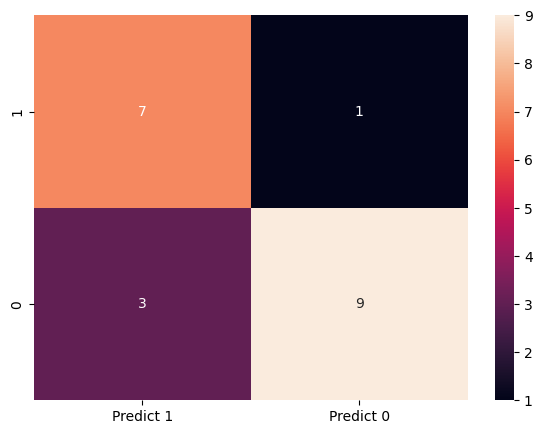

In [31]:
cm=metrics.confusion_matrix(y_test, y_predict, labels=[1, 0])

df_cm = pd.DataFrame(cm, index = [i for i in ["1","0"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True)

The confusion matrix

True Positives (TP): we correctly predicted that they do have diabetes 48

True Negatives (TN): we correctly predicted that they don't have diabetes 132

False Positives (FP): we incorrectly predicted that they do have diabetes (a "Type I error") 14 Falsely predict positive Type I error

False Negatives (FN): we incorrectly predicted that they don't have diabetes (a "Type II error") 37 Falsely predict negative Type II error